# Обработка сигналов

```{warning}
На данной странице под спойлерами находятся ячейки с кодом, реализующим пользовательский интерфейс на основе средств [ jupyter widgets](https://ipywidgets.readthedocs.io/en/stable/). На момент написания материалов графический интерфейс не встраивается на сайт при генерации `html` файлов, так что может потребоваться открытие исходный блокнотов `jupyter`, например, в `google colab` (кнопка сверху).  
```

## О сигналах 

В рамках данной страницы под сигналом $x$ будет подразумеваться последовательность чисел $x[n], \, n=0,\ldots,N-1$, где $N$ --- длинна сигнала, а $x[n]\in\mathbb{R}$ --- значение сигнала в дискретной временной точке $n$. 

## Дискретное преобразование Фурье

### Определение

Пусть имеется сигнал $x[n], \,n=0,\ldots,N-1$ длинной $N$. Тогда результат прямымого дискретного преобразования фурье (ДПФ, Discrete Fourier Transform, DPF) определяется выражением

$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-\tfrac{2\pi i}{N}kn}, \, k=0,\ldots,N-1,
$$

где $X[k]$ --- результат прямого дискретного преобразования Фурье, $i$ --- мнимая единица. Прямое преобразование Фурье обратимо и обратное дискретное преобразование Фурье определяется выражением 

$$
x[n] = \dfrac1N \sum_{k=0} X[k] e^{\tfrac{2\pi i}{N}kn}, \, k=0,\ldots,N-1.
$$

```{note}
В литературе чаще всего стречается именное такое определение преобразований Фурье, когда перед обратным преобразованием Фурье ставится множитель $\dfrac1N$, и именно такое определение заложенно во все методы библиотеки `scipy`. Однако иногда можно встретить и другие нормироваки такого преобразования. 
```

### Базис Фурье 

Дискретное преобразование Фурье линейное и по сути дела является разложением по Фурье базису, элементы которого являются комплексными синусоидами 

$$
\omega_k[n] = e^{\tfrac{2\pi i}{N}kn} = \cos\left(\dfrac{2\pi}{N}kn\right) + i\sin\left(\dfrac{2\pi}{N}kn\right), \, k=0,\ldots,N-1.
$$

С учетом этого факта прямое преобразование Фурье можно записать в матричном виде 

$$
X = \mathcal{F}x,
$$

где матрица перехода $\mathcal{F}$ имеет вид.

$$
\mathcal{F} = \begin{pmatrix}
1 & 1 & 1 & 1 & \cdots & 1 \\
1 & \omega & \omega^2 & \omega^3 & \cdots & \omega^{N-1} \\
1 & \omega^2 & \omega^4 & \omega^6 & \cdots & \omega^{2(N-1)} \\
1 & \omega^3 & \omega^6 & \omega^9 & \cdots & \omega^{3(N-1)} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega^{N-1} & \omega^{2(N-1)} & \omega^{3(N-1)} & \cdots & \omega^{(N-1)^2}
\end{pmatrix}, \quad \omega = e^{\tfrac{2\pi i}{N}}.
$$

Столбцы этой матрицы и являются элементами Фурье базиса. Сгенерировать такую матрицу заданного размера можно методом [scipy.linalg.dft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.dft.html). В ячейке ниже определяется функция `plot_basis_vector` для визуализации базисных векторов Фурье, а под ней прокидывается интерактивный интерфейс к этой функции.

In [1]:
import numpy as np
from scipy.linalg import dft
from matplotlib import pyplot as plt


def plot_basis_vector(length: int, index: int): 
    basis_vector = dft(length)[:, index]
    real, imag = basis_vector.real, basis_vector.imag

    fig, axs = plt.subplots(figsize=(16, 8), layout="tight", nrows=2)
    axs[0].stem(real)
    axs[0].set_ylabel("Re$\omega_k[n]$", size=20)
    axs[1].stem(imag)
    axs[1].set_ylabel("Im$\omega_k[n]$", size=20)
    for ax in axs:
        ax.set_xlabel("$n$", size=20)

In [2]:
import ipywidgets as widgets

N = 128
widgets.interact(
    plot_basis_vector,
    length=widgets.fixed(N),
    index=widgets.IntSlider(min=0, max=N-1)
)

interactive(children=(IntSlider(value=0, description='index', max=127), Output()), _dom_classes=('widget-inter…

<function __main__.plot_basis_vector(length: int, index: int)>

Отсюда видно, что элементы базиса Фурье --- синусоиды и косинусоиды разной кратности (гармоники), помещающиеся целое число раз на отрезке $[0, \ldots, N-1]$. Базис Фурье является ортогональным, но не является ортонормированным.

### Быстрое преобразование Фурье. `scipy.fft`

Итак, результатом прямого преобразования Фурье сигнала $x$ является последовательность комплексных чисел $X[k]$, которые являются коэффициентами разложения сигнала $x$ по гармоникам. В модуле `scipy.fft` определенно множество функций для Фурье-анализа сигналов. Аббревиатура **FFT** происходит из **F**ast **F**ourier **T**transform --- [быстрое преобразование Фурье](https://ru.wikipedia.org/wiki/%D0%91%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A4%D1%83%D1%80%D1%8C%D0%B5) (**БПФ**) --- алгоритм ускоренного вычисления дискретного преобразования Фурье. За прямое и обратное быстрое преобразование сигнала произвольной природы (возможно комплексного) отвечают функции [fft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy.fft.fft) и [ifft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.ifft.html#scipy.fft.ifft), возвращающие комплекснозначный `numpy` массив всех коэффициентов.

При этом можно показать, что если исходный сигнал $x$ действительнозначный, то 

$$
\begin{cases}
\mathop{\mathrm{Re}} X[k] =  \mathop{\mathrm{Re}} X[N-k], & k=1,\ldots,\left\lfloor\dfrac{N}{2}\right\rfloor, \\
\mathop{\mathrm{Im}} X[k] = -\mathop{\mathrm{Im}} X[N-k], & k=1,\ldots,\left\lfloor\dfrac{N}{2}\right\rfloor.
\end{cases}
$$

Иными словами половину коэффициентов Фурье действительнозначного сигнала можно отбросить. Функция [rfft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html#scipy.fft.rfft) делает именно это: она возвращает только половину необходимых коэффициентов Фурье, а функция [irfft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.irfft.html#scipy.fft.irfft) осуществляет обратное преобразование Фурье, исходя из предположения, что ей на вход подаётся только половина коэффициентов Фурье, а оставшееся половина восстанавливается из поданных по формулам выше.



### Физический смысл

Модуль $|X[k]|$ и аргумент $\angle X[k]$ коэффициента разложения Фурье называют **амплитудой** и **фазой** $k$-й гармоники. Амплитуда гармоники определяет степень её присутствия в исходном сигнале, а фаза --- сдвиг этой гармоники по времени. 


Проще всего продемонстрировать смысл коэффициентов разложения Фурье, если сигнал изначально представляет собой линейную комбинацию гармоник. В ячейке ниже определяется функция `plot_sinusoid_fft`, визуализирующая Фурье-анализ сигнала вида

$$
x[n] = A_1\cos(\dfrac{2\pi}{N}\omega_1(n - b_1)) + A_2\cos(\dfrac{2\pi}{N}\omega_2(n - b_3)) + A_3\cos(\dfrac{2\pi}{N}\omega_3(n - b_3)).
$$

В скрытой ячейке ещё ниже прокидывается графический интерфейс, для интерактивного взаимодействия с функцией для визуализации. Подвигав ползунки создайте сигнал из одной гармоники ($A_1=1$), и изучите как изменяется спектральное представление сигнала при изменении частоты гармоники ($\omega_1$) и ($b_1$). Для наглядности рекомендуется использовать метод `rfft` (флажок `real signal`) и полярное представления (флажок `polar`). Флажок `prevent phase artifacts` предотвращает загрязнение графики с фазами, связанное с неустойчивостью вычислений угла комплексного числа при его близости к нулю.

In [3]:
from scipy.fft import fft, rfft
import matplotlib.gridspec as gridspec

def plot_sinusoid_fft(
    real_signal: bool,
    polar: bool,
    mask_zeros: bool,
    A1: int,
    A2: int,
    A3: int,
    omega1: int,
    omega2: int,
    omega3:int,
    b1: int,
    b2: int,
    b3: int,
): 
    c = 2 * np.pi / N
    t = np.arange(N)
    signal = A1*np.cos(c*omega1*(t-b1)) + A2*np.cos(c*omega2*(t-b2)) + A3*np.cos(c*omega3*(t-b3))
    
    transform_function = rfft if real_signal else fft
    fourier = transform_function(signal)
    real, imag = fourier.real, fourier.imag
    magnitude, phase = np.abs(fourier), np.angle(fourier)
    if mask_zeros:
        phase = np.where(magnitude > 0.0001, phase, 0)
    
    fig = plt.figure(figsize=(16, 8), tight_layout=True)
    gs = gridspec.GridSpec(2, 2)
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])
    
    ax1.stem(signal)
    ax2.stem(magnitude if polar else real)
    ax3.stem(phase if polar else imag)
    for ax in (ax1, ax2, ax3):
        ax.set_xlabel("$k$", size=20)
        
    ax1.set_ylabel("$x[k]$", size=20)
    ax2.set_ylabel("$|X[k]|$" if polar else "Re $X[k]$", size=20)
    ax3.set_ylabel(r"$\angle X[k]$" if polar else "Im $X[k]$", size=20)
    
    if polar:
        ax3.set_yticks([-np.pi, -np.pi/2, 0., np.pi/2, np.pi])

In [4]:
from IPython.display import display
from ipywidgets import widgets

N = 64

real_signal = widgets.Checkbox(False, description="real signal")
polar = widgets.Checkbox(True, description="polar")
mask_zeros = widgets.Checkbox(True, description="prevent phase artifacts")
A1 = widgets.IntSlider(min=-5, max=5, description="$A_1$")
A2 = widgets.IntSlider(min=-5, max=5, description="$A_2$")
A3 = widgets.IntSlider(min=-5, max=5, description="$A_3$")
omega1 = widgets.IntSlider(min=0, max=N//2, description="$\omega_1$")
omega2 = widgets.IntSlider(min=0, max=N//2, description="$\omega_2$")
omega3 = widgets.IntSlider(min=0, max=N//2, description="$\omega_3$")
b1 = widgets.IntSlider(min=0, max=N-1, description="$b_1$")
b2 = widgets.IntSlider(min=0, max=N-1, description="$b_2$")
b3 = widgets.IntSlider(min=0, max=N-1, description="$b_3$")

ui = widgets.VBox([
    widgets.HBox([real_signal, polar, mask_zeros]),
    widgets.HBox([A1, omega1, b1]),
    widgets.HBox([A2, omega2, b2]),
    widgets.HBox([A3, omega3, b3]),
])

variables = ("real_signal", "polar", "mask_zeros", "A1", "A2", "A3", "omega1", "omega2", "omega3", "b1", "b2", "b3")
out = widgets.interactive_output(
    plot_sinusoid_fft,
    {varname: globals()[varname] for varname in variables}
)

display(out, ui)

Output()

### Пример Фурье анализа

#### Цикл солнечной активности

Рассмотрим уже знакомый вам график солнечной активности. 

Text(0, 0.5, 'activity')

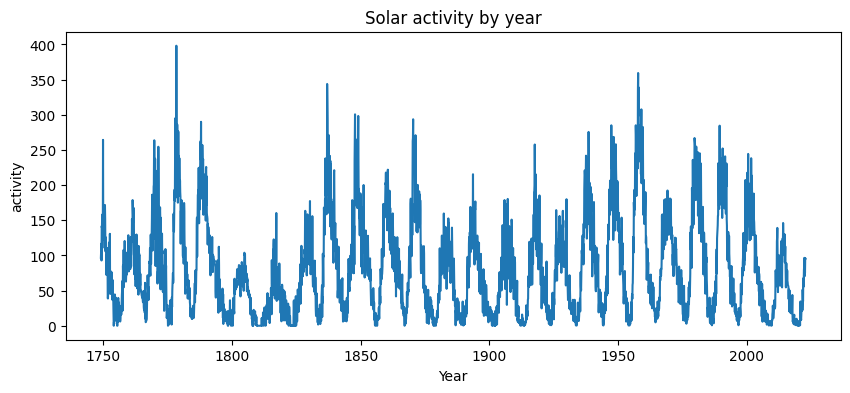

In [5]:
from pathlib import Path
import pandas as pd
from scipy.fft import fftfreq

folder = Path("..", "..") / "assets" / "data" / "signals"
path = folder / "solar_activiry.npy"
year, activity = np.load(path)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(year, activity)
ax.set_title("Solar activity by year")
ax.set_xlabel("Year")
ax.set_ylabel("activity")

На графике в глаза бросается некоторая сезонность: попробуем определить её период. Для этого вычислим преобразование Фурье и построим график, но по горизонтальное оси отложим не частоту, а период. Так как частота --- количество полных колебаний за измеренный диапазон, то период $T$ соответствующей синусоиды с частотой $\omega$ можно найти по формуле 

$$
T =  \dfrac{\text{number of years}}{\omega}.
$$

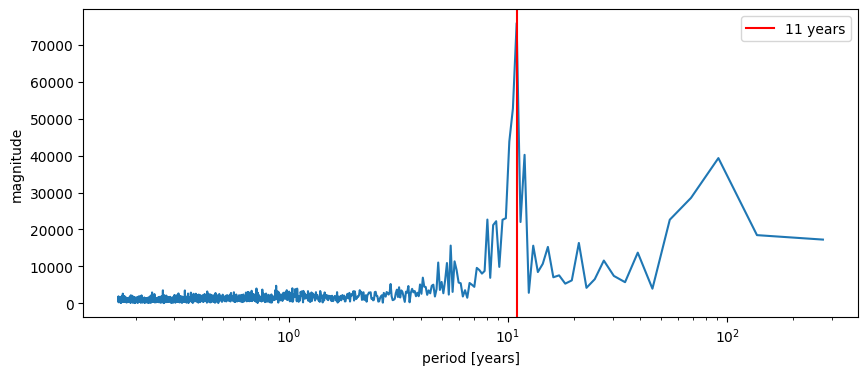

In [6]:
fourier = rfft(activity)
magnitudes = np.abs(fourier)
years_span = year.max() - year.min()
frequency = years_span / np.arange(1, fourier.size)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(frequency, magnitudes[1:])
ax.set_xlabel("period [years]")
ax.set_ylabel("magnitude")
ax.set_xscale("log")
ax.axvline(11, color="red", label="11 years")
ax.legend()

На полученном графике в глаза бросается период в 11 лет, что согласуется с данными из [википедии](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%BB%D0%BD%D0%B5%D1%87%D0%BD%D0%B0%D1%8F_%D1%86%D0%B8%D0%BA%D0%BB%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C).

#### Музыкальные инструменты

На сайте [колумбийского университета](https://www.ee.columbia.edu/~dpwe/sounds/instruments/) можно найти короткие записи отдельных нот сыгранных разными инструментами в формате [WAV](https://en.wikipedia.org/wiki/WAV). Человеческий слух может отличить один инструмент от другого без особых проблем. Построим графики этих записей для ноты **до** и посмотрим, насколько легко отличить инструменты друг от друга визуально. 

```{note}
Для чтения аудиозаписей в формате WAV подходит метод [scipy.io.wavfile.read](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html).
```

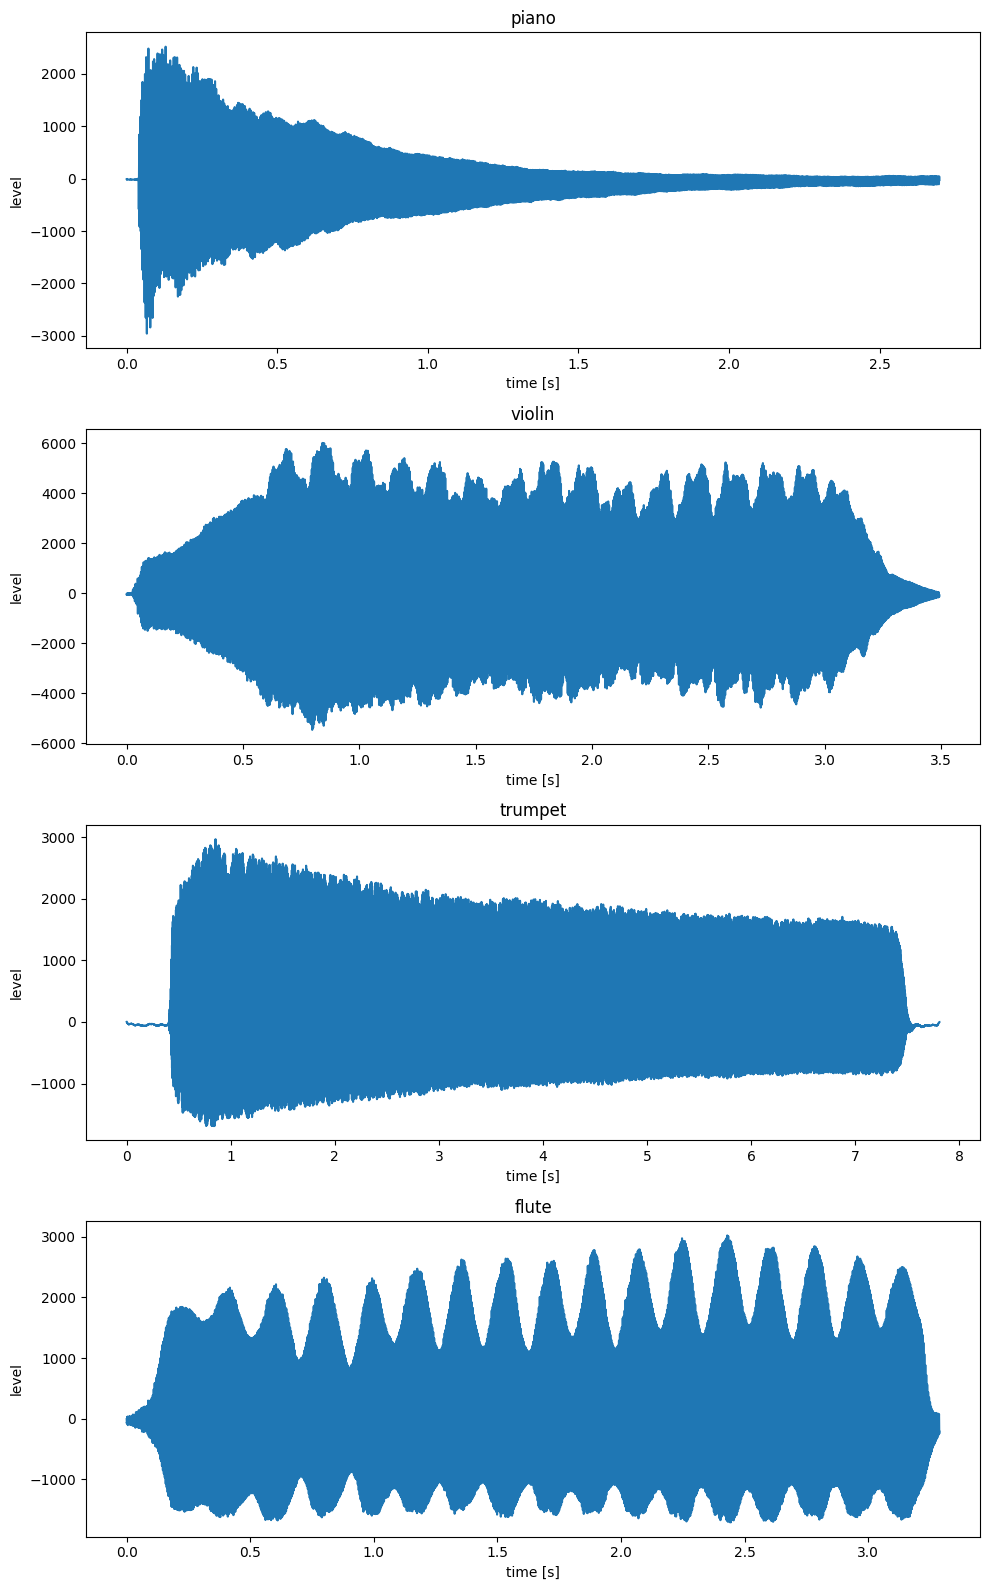

In [7]:
from scipy.io import wavfile

instruments = ["piano", "violin", "trumpet", "flute"]

def plot_audio_wave(ax: plt.Axes, instrument: str):
    path = folder / f"{instrument}-C4.wav"
    sample_rate, audio_wave = wavfile.read(path)
    audio_length = audio_wave.size / sample_rate
    timestamps = np.linspace(0, audio_length, audio_wave.size)

    ax.plot(timestamps, audio_wave)
    ax.set_xlabel("time [s]")
    ax.set_ylabel("level")
    ax.set_title(instrument)

fig, axs = plt.subplots(figsize=(10, 16), nrows=4, layout="tight")
for ax, instrument in zip(axs.flatten(), instruments):
    plot_audio_wave(ax, instrument)


Построенные графики не так уж легко анализировать. Гораздо проще будет анализировать их в частотном спектре. Внизу определяется функция, которая строит частотный спектр и выводит аудиоплеер с записью, а в скрытой ячейке ещё ниже к этой функции прокидывается графический интерфейс.  

In [8]:
def music_spectral_analysis(instrument: str, tone: str, fundamental_tone: float):
    path = folder / f'{instrument}-{tone}.wav'
    sample_rate, audio_wave = wavfile.read(path)
    
    fourier = fft(audio_wave)
    magnitudes = np.abs(fourier)
    frequencies = fftfreq(n=audio_wave.size, d=1/sample_rate)
    max_frequency = 2_000
    
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(frequencies, magnitudes)
    ax.set_xticks(np.arange(0, max_frequency, fundamental_tone))
    ax.set_ylim(0, 3 * 1e7)
    ax.set_xlim(-5, max_frequency)
    ax.set_xlabel("frequency [Hz]")
    ax.set_ylabel("level")
    ax.set_title(f"{instrument} {tone}")
    
    audio_player = widgets.Audio.from_file(path, autoplay=False, loop=False)
    return audio_player

In [9]:
output = widgets.interact(
    music_spectral_analysis,
    instrument=widgets.ToggleButtons(
        options=instruments,
        description="Instrument"
    ),
    tone=widgets.ToggleButtons(
        options=["C4", "G4", "C5"],
        description="Tone"
    ),
    fundamental_tone=widgets.fixed(261.63)
)


interactive(children=(ToggleButtons(description='Instrument', options=('piano', 'violin', 'trumpet', 'flute'),…

На построенных графиках видно, что звук распределяется по определенным частотам спектра. Самая низкая из таких частот называется [тоном](https://ru.wikipedia.org/wiki/%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D0%BE%D0%B9_%D1%82%D0%BE%D0%BD), и именно он определяет высоту звука. Так, например, ноте **до** из четвертый октавы соответствует частота 261.63 Гц ([источник](https://pages.mtu.edu/~suits/notefreqs.html)). Остальные, кратные основному тону, частоты называют --- [обертонами](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D0%B5%D1%80%D1%82%D0%BE%D0%BD). Распределение звука по обертонам называют [тембром](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BC%D0%B1%D1%80), и именно по тембр меняется в зависимости от инструмента, на котором сыграна нота.

### Фильтрация низких частот

ДПФ можно использовать для фильтрации определенных частот в сигнале. Распространенный пример --- [фильтр нижних частот](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D0%BD%D0%B8%D0%B6%D0%BD%D0%B8%D1%85_%D1%87%D0%B0%D1%81%D1%82%D0%BE%D1%82), который эффективно пропускает частотный спектр сигнала ниже некоторой частоты (частоты среза) и подавляет частоты сигнала выше этой частоты. Такого рода фильтрация иногда применяется в том числе и для фильтрации шумов: несущий информацию сигнал попадает в низкочастотную область, а помехи дают вклад на высоких частотах.

Для реализации такого фильтра в дискретном случае достаточно проделать следующие шаги.
1. Совершить прямое дискретное преобразование Фурье;
2. Занулить все коэффициенты получившегося разложения, которые соответствуют частотам выше заданной;
3. Совершить обратное дискретное преобразование Фурье для разложения с зануленными коэффициентами.


В ячейке ниже определяется функция `plot_fourier_filter`, визуализирующая действие такого фильтра на зашумленный сигнал в зависимости от пороговой частоты. В скрытой ячейке ещё ниже прокидывается графический интерфейс, для интерактивного взаимодействия с этой функцией. Регулируя положение ползунка, отвечающего за пороговую частоту фильтрации, можно попробовать восстановить исходный сигнал.

In [23]:
from scipy.fft import rfft, irfft

def plot_fourier_filter(signal, noisy_signal, treshold_frequency):
    fourier = rfft(noisy_signal)
    m = fourier.size
    low_freq = irfft(np.where(np.arange(m)>treshold_frequency, 0, fourier))
    high_freq = irfft(np.where(np.arange(m)>treshold_frequency, fourier, 0))
    fig, axs = plt.subplots(figsize=(16, 8), layout="tight", ncols=2, nrows=2)
    titles = ["Исходный сигнал", "Исходный сигнал + шум", "Низкие частоты", "Высокие частоты"]
    ys = [signal, noisy_signal, low_freq, high_freq]
    for ax, y, title in zip(axs.flatten(), ys, titles):
        ax.plot(y)
        ax.set_xlabel("$k$")
        ax.set_ylabel("$y$")
        ax.set_title(title, size=20)


In [24]:
signal = np.load(folder / "triangle.npy")
n = signal.size
noisy_signal = signal + np.random.uniform(0, 0.25, size=n)
widgets.interact(
    plot_fourier_filter,
    signal=widgets.fixed(signal),
    noisy_signal=widgets.fixed(noisy_signal),
    treshold_frequency=widgets.IntSlider(value=0, min=0, max=n-1)
)

interactive(children=(IntSlider(value=0, description='treshold_frequency', max=255), Output()), _dom_classes=(…

<function __main__.plot_fourier_filter(signal, noisy_signal, treshold_frequency)>

## Свертка и взаимокорреляция

### Скользящее среднее

Идея скользящего среднего очень хорошо иллюстрируется в названии операции: окно фиксированной ширины скользит вдоль по массиву и усредняет все попавшие в него значения.

```{figure} /_static/lecture_specific/signal/moving_average.gif
```

Пусть $x[i], \, i=0,\ldots,n-1$ --- исходный сигнал, тогда результат скользящего среднего $y$ с окном шириной $m$ определяется выражением

$$
y[j] = \dfrac{1}{m}\sum_{i=0}^{m - 1} x[i + j], \quad j=0,\ldots,n-m.
$$

Анимация ниже иллюстрирует эту формулу при длине исходного сигнала $n=5$ и ширине окна скользящего окна $m=3$.

```{figure} /_static/lecture_specific/signal/moving_average_discrete.gif
```

Представим теперь операцию усреднения внутри окна в виде операции взвешенной суммы с коэффициентами $\dfrac{1}{m}$:

$$
y[j] = \sum_{i=0}^{m - 1} x[i + j] \cdot \dfrac{1}{m}, \quad j=0,\ldots,n-m.
$$


```{figure} /_static/lecture_specific/signal/moving_average_convolve.gif
```

### Свертка `vs` взаимокорреляция

#### Свёртка

Такую операцию можно рассмотреть в качестве частного случая **свертки** (англ. `convolution`), которая получится, если значения $\dfrac{1}{m}$ заменить на набор произвольных коэффициентов $\omega = \{\omega[i], \, i=1,\ldots,m-1\}$ следующим образом

$$
y[j] = \sum_{i=0}^{m - 1} x[i + j]\cdot\omega[m - i - 1], \quad j=0,\ldots,n-m.
$$

```{figure} /_static/lecture_specific/signal/convolution.gif
```

```{note}
Обратите внимание, что в скользящем окне коэффициенты $\omega[i], \, i=1,\ldots,m-1$ заполнены в обратном порядке.
```

Набор коэффициентов $\omega[i], \, i=1,\ldots,m-1$ называют **ядром** (англ. `kernel`). Пусть $x$ --- исходный сигнал, $\omega$ --- ядро свертки, тогда результат действия $y$ свертки с ядром $\omega$ на сигнал $x$ будем обозначать $y = x\circledast \omega$.
 
#### Взаимокорреляция

Если же в скользящем окне заполнить коэффициенты $\omega[i], \, i=1,\ldots,m-1$ в прямом порядке, то получится операция, которую называют **взаимокорреляцией** (англ. `convolution`). В данном случае речь обычно идёт о взаимной корреляции двух сигналов, хотя в определенных можно встретить термин "ядро" и по отношению к $\omega$ тоже.

$$
y[j] = \sum_{i=0}^{m - 1} x[i + j]\cdot\omega[i], \quad j=0,\ldots,n-m.
$$

```{figure} /_static/lecture_specific/signal/cross_correlation.gif
```

### Реализация в `scipy.signal`

Вычислить взаимокорреляцию двух сигналов можно методом [signal.correlate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html#scipy.signal.correlate), а свёртку методом [signal.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html#scipy.signal.convolve). Оба метода в качестве первых двух параметров принимают два массива, которые представляют два сигнала или сигнал и ядро свёртки. 

Однако у обоих методов есть опциональный параметр `mode`, который отвечает за итоговый размер получившегося массива. Он может принимать один из трех возможных значений: `same`, `valid` или `full`.

#### Режим `valid`

В режиме `valid` окно с ядром скользит только в тех пределах, где ядро полностью накладывается на исходных сигнал. 

```{figure} /_static/lecture_specific/signal/valid.gif
```

Итоговая длина сигнала получается $n - m + 1$, где $n$ --- длина исходного сигнала, а $m$ --- размер ядра.

#### Режим `same`

В режиме `same` исходный сигнал $x$ дополняется необходимым количеством нулей с правой стороны (это количество равно $m-1$, если $m$ --- размер ядра), чтобы итоговый сигнал имел такую же длину. 

```{figure} /_static/lecture_specific/signal/same.gif
```

#### Режим `full`

В режиме `full` окно с ядром скользит в пределах, где ядро накладывается на исходный сигнал хотя бы одним элементом. Для этого приходится дополнять исходный массив с обеих сторон $m - 1$ нулями.

```{figure} /_static/lecture_specific/signal/full.gif
```

Итоговая длина сигнала получается $n + m - 1$, где $n$ --- длина исходного сигнала, а $m$ --- размер ядра.

### Взаимная корреляция для локализации шаблона

Операция вычисления взаимной корреляции сигнала $x$ с шаблонным сигналом $y$ может быть использована для локализации шаблона внутри этой последовательности, т.к. значение корреляции совпадает с мерой схожести [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) для векторов $A$ и $B$

$$
\cos\theta = \dfrac{A \cdot B}{\|A\|\|B\|}\in{[-1, 1]}. 
$$

Массив взаимной корреляции совпадает с числителем этой дроби для всех положений шаблона $y$ внутри сигнала $x$, если принять, что $x=A$ и $y=B$. Чтобы вычислить меру схожести для каждого из положений шаблона внутри сигнала, остаётся только поделить массив взаимной корреляции на соответствующие нормы. Норма массива $y$ постоянна, а вот норма части массива $x$, попавшей под шаблон меняется, и для её вычисления требуется произвести оконную операцию. 

Внизу приводится функция `rolling_cosine_similarity`, вычисляющая косинусную меру схожести описанным выше способом, и функция `locate_template`, визуализирующая способ локализации шаблона на основе такого подхода. 

In [93]:
from scipy.signal import correlate
from numpy.linalg import norm
from numpy.lib.stride_tricks import sliding_window_view


def rolling_cosine_similarity(signal, template, eps=1e-10):
    template_norm = norm(template)
    signal_norm = norm(sliding_window_view(signal, template.size), axis=1)
    return correlate(signal, template, mode="valid") / (signal_norm * template_norm + eps)
     
     
def locate_template(signal, template, shift):
    template_x = np.arange(template.size) + shift
    cross_correlation = rolling_cosine_similarity(signal, template)
    correlation = cross_correlation[shift]

    fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), layout="tight", nrows=2)
    ax1.plot(signal, color="green", label="signal")
    ax1.plot(template_x, template, color="red", label="template")
    ax1.set_xlabel("$k$")
    ax1.set_ylabel("$y$")
    ax1.set_xticks(np.arange(0, 256, 28))
    ax1.legend()
    
    ax2.plot(cross_correlation)
    ax2.set_xlabel("lag")
    ax2.set_ylabel("correlation")
    ax2.axhline(0, color="black")
    ax2.set_xticks(np.arange(0, 256, 28))
    ax2.set_title(f"{shift=}, {correlation=:.1f}")
    ax2.stem(shift, correlation, "r")

In [94]:
template = np.load(folder / "template.npy")
signal = np.load(folder / "triangle_step.npy")
widgets.interact(
    locate_template,
    signal=widgets.fixed(signal),
    template=widgets.fixed(template),
    shift=widgets.IntSlider(0, 0, signal.size - template.size)
)

interactive(children=(IntSlider(value=0, description='shift', max=191), Output()), _dom_classes=('widget-inter…

<function __main__.locate_template(signal, template, shift)>

### Теорема о свёртке

Несмотря на то, что взаимная корреляция может показаться более естественной операцией, математики больше любят именно свёртку. Основная причина этому --- свойства свёртки, например, теорема о свёртке.

**Теорема о свёртке.** Пусть $\mathcal{F}(x)$ и $\mathcal{F}(y)$ --- Фурье образы сигналов одинаковой длины $x$ и $y$. Тогда справедливо равенство 

$$
\mathcal{F}(x \circledast y) = \mathcal{F}(x) \cdot \mathcal{F}(y),
$$

где операция "$\cdot$" --- операция поэлементного умножения массивов. 

Продемонстрируем это свойство на примере вычисления скользящего среднего. Скользящее среднее шириной $m$ можно представить в качестве свёртки с ядром $\omega_i = \dfrac{1}{m}$. 

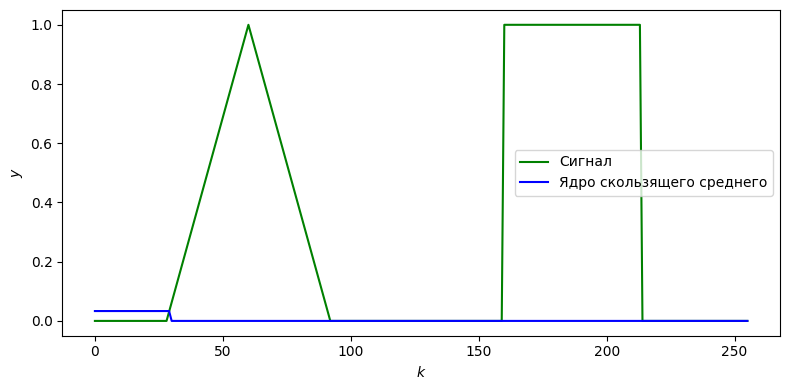

In [169]:
signal = np.load(folder / "triangle_step.npy")
n, m = signal.size, 30
filter = np.zeros(n)
filter[:m] = 1 / m

fig, ax = plt.subplots(figsize=(8, 4), layout="tight")
ax.plot(signal, color="green", label="Сигнал")
ax.plot(filter, color="blue", label="Ядро скользящего среднего")
ax.set_xlabel("$k$")
ax.set_ylabel("$y$")
ax.legend()


Теперь вычислим результат свёртки с этим ядром в явном виде и опираясь на теорему о свёртке, а затем сравним результаты.

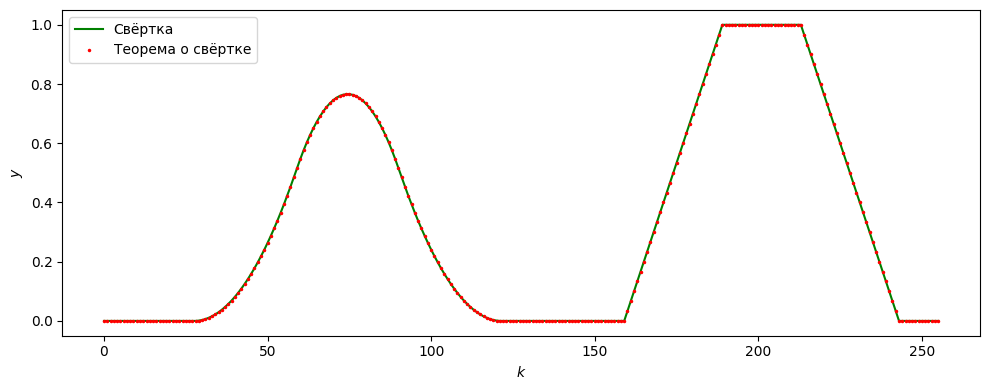

In [186]:
from scipy.signal import convolve

fourier_signal = rfft(signal)
fourier_filter = rfft(filter)
convolution_theorem = irfft(fourier_signal * fourier_filter, n=signal.size)

straightforward = convolve(signal, filter, "full")[:signal.size]

fig, ax = plt.subplots(figsize=(10, 4), layout="tight")
ax.plot(straightforward, color="green", label="Свёртка")
ax.plot(convolution_theorem, color="red", label="Теорема о свёртке", linestyle=" ", marker=".", markersize=3)
ax.set_xlabel("$k$")
ax.set_ylabel("$y$")
ax.legend()

Как видим результаты совпадают. Это позволяет быстро вычислять свертку для длинных сигналов: библиотека `scipy` тоже использует такой трюк.
Кроме того это позволяет анализировать, что делают те или иные фильтры. 

Например, ячейка ниже демонстрирует, что скользящее среднее можно считать (неидеальным) фильтром нижних частот.

In [33]:
from scipy.fft import rfft, irfft

def visualize_step_filter(signal, m: int):
    filter = np.zeros(signal.size)
    filter[:m] = 1 / m

    fourier_signal = rfft(signal)
    fourier_filter = rfft(filter)
    filtered_signal = irfft(fourier_signal * fourier_filter, n=signal.size)
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 8), layout="tight", nrows=2)
    ax1.plot(filtered_signal, color="red", label="Сглаженный сигнал")
    ax1.set_xlabel("$k$")
    ax1.set_ylabel("$y$")
    ax1.legend()

    ax2.plot(np.abs(fourier_filter))
    ax2.set_xlabel("frequency")
    ax2.set_ylabel("magnitude")

In [34]:
signal = np.load(folder / "triangle_step.npy")
widgets.interact(
    visualize_step_filter,
    signal=widgets.fixed(signal),
    m=widgets.IntSlider(1, 1, signal.size-1)
)

interactive(children=(IntSlider(value=1, description='m', max=255, min=1), Output()), _dom_classes=('widget-in…

<function __main__.visualize_step_filter(signal, m: int)>